In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import urllib
import re
import json

import tensorflow as tf
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('../data/movies_initial.csv')

In [ ]:
data.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie


Since the dataset contains a large number of columns, we will keep only the columns we need - title, imdbID, genre and poster.

In [ ]:
data = data[['title', 'imdbID', 'genre', 'poster']]
data.head()

,title,imdbID,genre,poster
0,Carmencita,1,"Documentary, Short",https://m.media-amazon.com/images/M/MV5BMjAzND...
1,Blacksmith Scene,5,Short,NaN
2,Pauvre Pierrot,3,"Animation, Comedy, Short",NaN
3,Edison Kinetoscopic Record of a Sneeze,8,"Documentary, Short",NaN
4,Employees Leaving the Lumi�re Factory,10,"Documentary, Short",NaN


In [ ]:
data.shape

(46014, 4)

In [ ]:
data['imdbID'].unique().shape

(44497,)

From the previous two cells, we can see that the imdbID is not unique. So we will remove it from the set and introduce a new indicator which is unique and which we call 'movieID'. It represents the index of a movie in the original dataset.

In [ ]:
data = data.drop(columns = ['imdbID'])

In [ ]:
data['movieID'] = [i for i in np.arange(len(data.title))]
data

,title,genre,poster,movieID
0,Carmencita,"Documentary, Short",https://m.media-amazon.com/images/M/MV5BMjAzND...,0
1,Blacksmith Scene,Short,NaN,1
2,Pauvre Pierrot,"Animation, Comedy, Short",NaN,2
3,Edison Kinetoscopic Record of a Sneeze,"Documentary, Short",NaN,3
4,Employees Leaving the Lumi�re Factory,"Documentary, Short",NaN,4
...,...,...,...,...
46009,The New Classmate,"Drama, Family",NaN,46009
46010,Untitled Christopher Nolan Project,Sci-Fi,NaN,46010
46011,Die Turnschuh-Giganten,"Biography, Drama, War",NaN,46011
46012,The Monster of Mangatiti,NaN,NaN,46012


In [ ]:
data.dropna(inplace = True)
data

,title,genre,poster,movieID
0,Carmencita,"Documentary, Short",https://m.media-amazon.com/images/M/MV5BMjAzND...,0
5,The Arrival of a Train,"Documentary, Short",https://m.media-amazon.com/images/M/MV5BMjEyND...,5
17,Cinderella,"Drama, Short",https://m.media-amazon.com/images/M/MV5BMTgwMD...,17
18,The Sign of the Cross,"Short, Fantasy",https://m.media-amazon.com/images/M/MV5BMjM1NT...,18
24,Jack and the Beanstalk,"Short, Fantasy",https://m.media-amazon.com/images/M/MV5BMjAzNT...,24
...,...,...,...,...
45945,Miss Sharon Jones!,Documentary,https://m.media-amazon.com/images/M/MV5BMTEyNj...,45945
45946,Baskin,"Fantasy, Horror",https://m.media-amazon.com/images/M/MV5BMTg0Mz...,45946
45949,In Jackson Heights,Documentary,https://m.media-amazon.com/images/M/MV5BMTk4Mz...,45949
45974,Cosmos Laundromat,"Animation, Short",https://m.media-amazon.com/images/M/MV5BODUwMj...,45974


To facilitate further data analysis, we will transform the movie genre column - instead of comma - separated values, we will use a list of genres.

In [ ]:
data['genre'] = data['genre'].apply(lambda x : [x] if ',' not in x else sorted(x.split(', ')))

In [ ]:
all_genres = sum(data.genre, [])

genres = set(all_genres)
genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [ ]:
genre_series = pd.Series(all_genres)

genre_series.value_counts()

Drama          17665
Comedy         11044
Romance         5216
Action          5005
Thriller        4764
Crime           4548
Horror          4001
Adventure       3526
Documentary     3052
Mystery         2147
Sci-Fi          2089
Family          1977
Fantasy         1800
Biography       1707
Animation       1517
History         1253
Music           1199
War             1076
Musical          778
Western          775
Short            645
Sport            631
Film-Noir        330
News              77
Adult             13
Talk-Show          1
Reality-TV         1
dtype: int64

The following function goes through the dataset and attempts to download the corresponding image via URL to the data/images folder named 'immovieID.jpg'. If the URL is not valid, it will be added to the list of invalid URLs.

In [ ]:
def save_images(dir_path):
  invalid_url = []

  for i in np.arange(data.shape[0]):
    url = data['poster'][i]
    image_id = data['movieID'][i]

    image_path = os.path.join(dir_path, 'im' + str(image_id) + '.jpg')

    try:
       response = urllib.request.urlopen(url)
       content = response.read()
       file = open(image_path, 'wb')
       file.write(bytearray(content))
       file.close()
       print(i)
    except:
       invalid_url.append(image_id)


In [ ]:
# save_images("data/images")

In [ ]:
def find_valid_urls(dir_path):
  valid_urls = []

  for file in os.listdir(dir_path):
      result = re.findall(r'im([0-9]+)\.jpg', file)
      if len(result) == 1:
          image_index = int(result[0])
      valid_urls.append(image_index)

  return valid_urls

In [ ]:
valid_urls = find_valid_urls("../data/images")

In [ ]:
invalid_url = [x for x in data.movieID if x not in valid_urls]
len(invalid_url)

22905

Removing all movies whose URLs were not valid from our dataset.

In [ ]:
data['movieID'] = data['movieID'].apply(lambda x : x if x not in invalid_url else None)

In [ ]:
data = data.dropna()
data.reset_index(inplace = True)
data

,index,title,genre,poster,movieID
0,69,The Life and Death of King Richard III,[Drama],https://m.media-amazon.com/images/M/MV5BMTQ1OD...,69.0
1,74,Ingeborg Holm,[Drama],https://m.media-amazon.com/images/M/MV5BMTI5Mj...,74.0
2,85,Fantomas Against Fantomas,[Drama],https://m.media-amazon.com/images/M/MV5BMTQxND...,85.0
3,91,Hypocrites,[Drama],https://m.media-amazon.com/images/M/MV5BMjA5NT...,91.0
4,93,Judith of Bethulia,[Drama],https://m.media-amazon.com/images/M/MV5BMjA3Nj...,93.0
...,...,...,...,...,...
12768,45813,The Bride He Bought Online,[Thriller],https://m.media-amazon.com/images/M/MV5BMjMwOT...,45813.0
12769,45831,Chris Tucker Live,[Comedy],https://m.media-amazon.com/images/M/MV5BMTU1Mz...,45831.0
12770,45888,Scenes of a Sexual Nature,"[Comedy, Drama, Romance]",https://m.media-amazon.com/images/M/MV5BMTA5OT...,45888.0
12771,45910,Arianna,[Drama],https://m.media-amazon.com/images/M/MV5BMTA1ND...,45910.0


Display of the first 10 saved images. We know the path to the image because for each image there is a unique ID - movieID involved in this path.

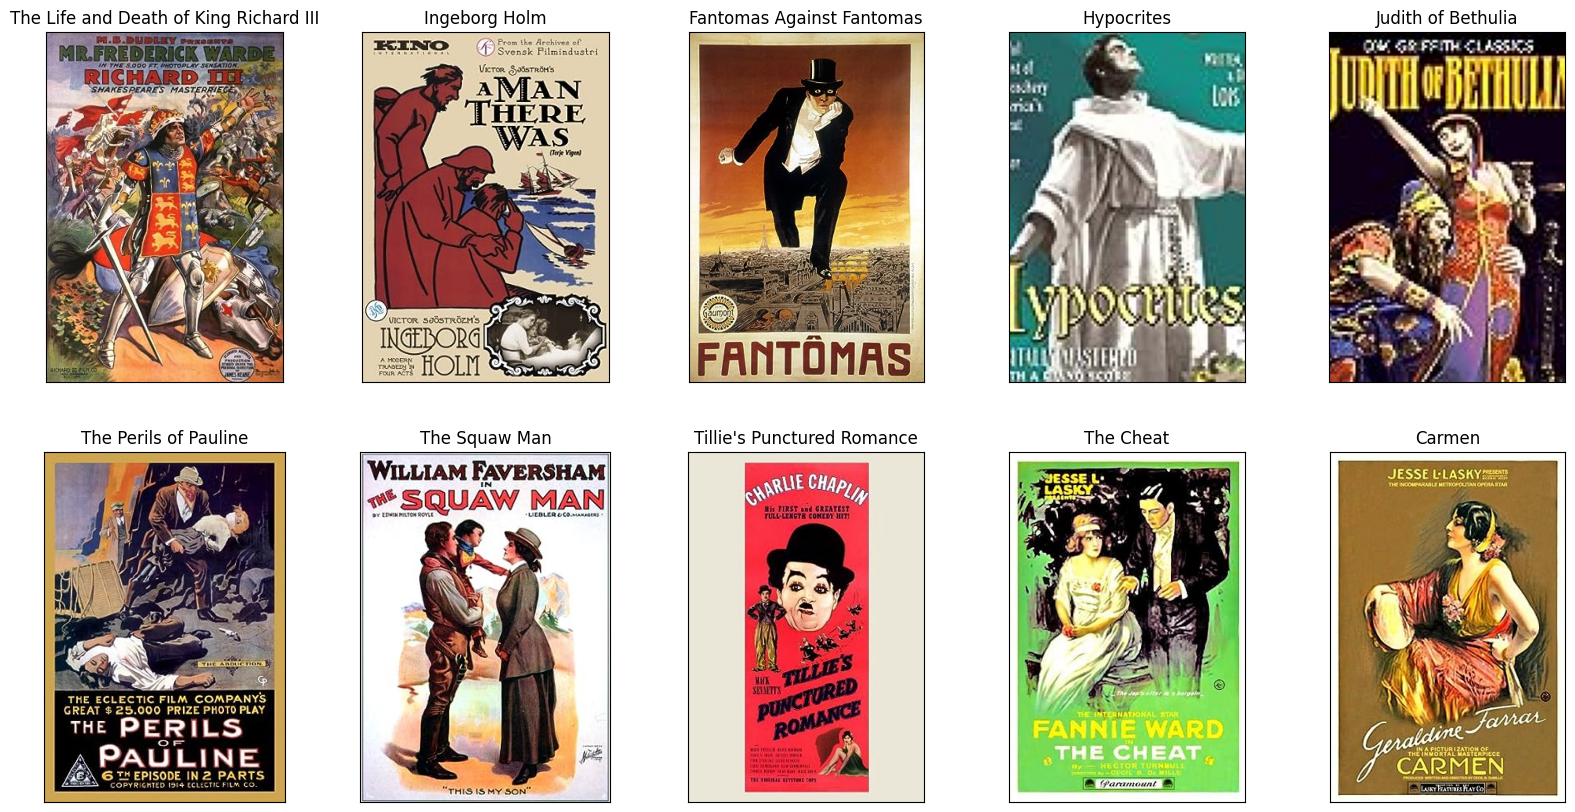

In [ ]:
plt.figure(figsize = (20, 10))

j = 0
for i in data['movieID'][:10]:
    i = int(i)
    im = plt.imread('../data/images/im' + str(i) + '.jpg')

    plt.subplot(2, 5, j + 1)

    plt.xticks([])
    plt.yticks([])
    plt.imshow(im, cmap='gray')
    plt.imshow(im)
    plt.title(data['title'][j])

    j += 1

The following function reads the stored images, resizes them to the format (80, 80, 3), converts them to an array, and normalizes them. From this array, a numpy array is created, representing X.

In [ ]:
def image_preprocessing(dir_path, df):
    image_data = []

    for i in df.movieID:
        img_path = dir_path + "/im" + str(int(i)) + '.jpg'
        img = image.load_img(img_path, target_size = (80, 80, 3))
        img = image.img_to_array(img)
        img = img/255.0
        image_data.append(img)
        print(i)


    X = np.array(image_data)

    print("Shape of images:", X.shape)

    return X

After filtering the dataset, we can see which genres are left. We will plot the distribution of these genres.

In [ ]:
all_genres = sum(data.genre, [])

genres = set(all_genres)
genres

{'Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller'}

<BarContainer object of 7 artists>

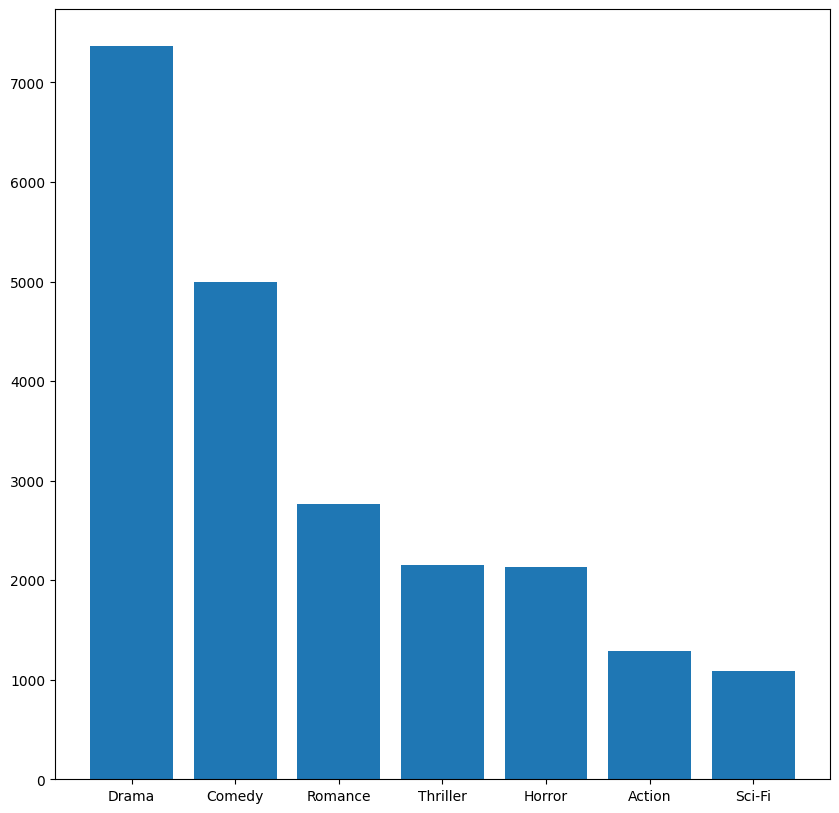

In [ ]:
genre_series = pd.Series(all_genres)

index = genre_series.value_counts().index
values = genre_series.value_counts().values

plt.figure(figsize=(10,10))
plt.bar(index, values)

As we can see from the plot, our set is very unbalanced, but that is to be expected.

In [ ]:
genre_map = {}

for i in np.arange(len(values)):
  genre_map[index[i]] = int(values[i])

genre_map

{'Drama': 7367,
 'Comedy': 4994,
 'Romance': 2768,
 'Thriller': 2154,
 'Horror': 2137,
 'Action': 1291,
 'Sci-Fi': 1090}

In [ ]:
json_map = json.dumps(genre_map)
print(json_map)

{"Drama": 7367, "Comedy": 4994, "Romance": 2768, "Thriller": 2154, "Horror": 2137, "Action": 1291, "Sci-Fi": 1090}


In [ ]:
with open('../data/genres.json', 'w') as f:
  json.dump(json_map, f)

We will preprocess the images only once and write them to the file. Each time the notebook is started again, the data for X will be read from that file.

In [ ]:
# X = image_preprocessing("../data/images", data)

In [ ]:
# np.save('../data/X_data80.npy', X)

In [ ]:
X = np.load('../data/other/X_data80.npy')

As we have already seen, we will show the first 10 preprocessed images using plot.

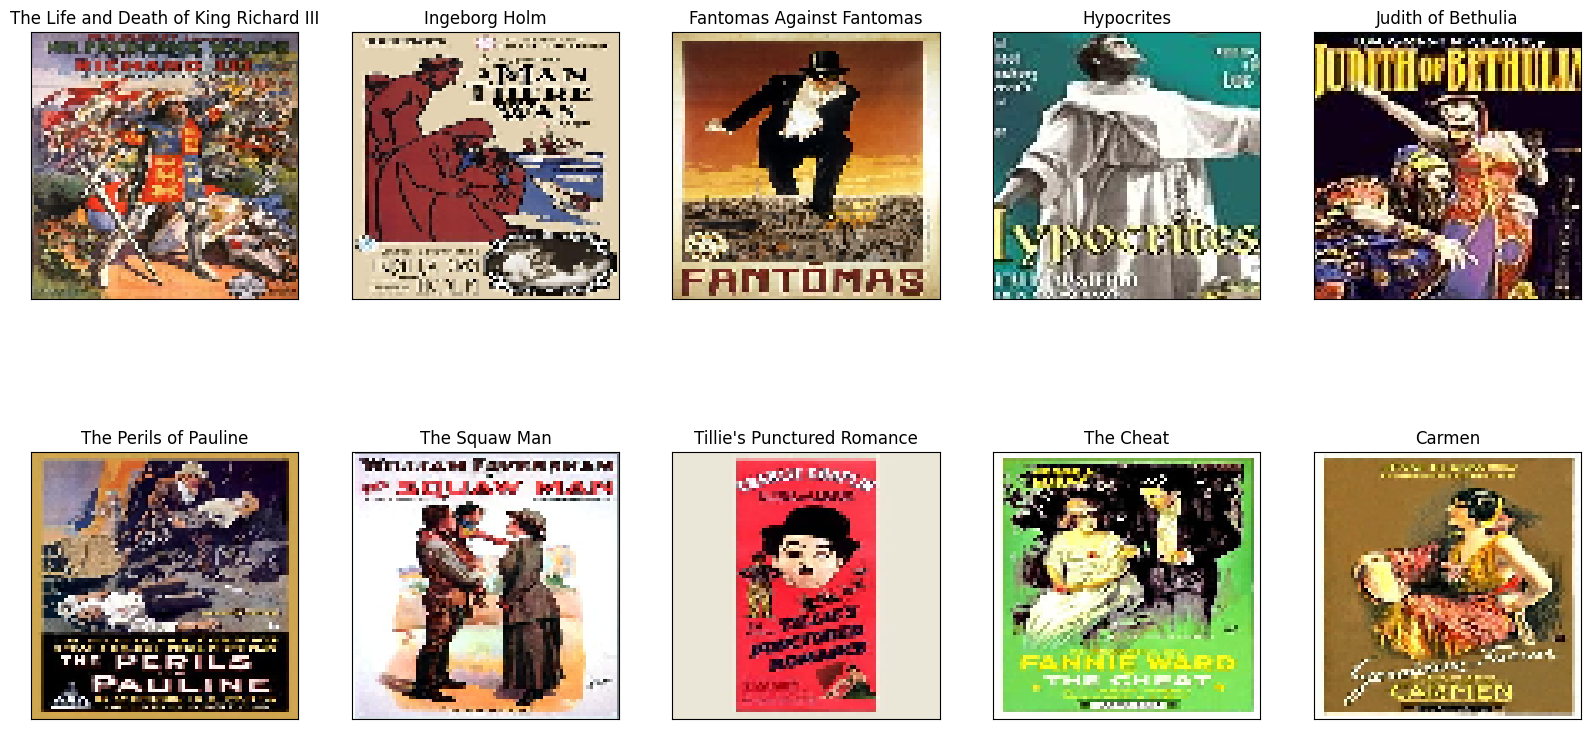

In [ ]:
plt.figure(figsize = (20, 10))

j = 0
for i in range(10):
    img = X[i]
    plt.subplot(2, 5, j + 1)

    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    plt.imshow(img)
    plt.title(data['title'][j])

    j += 1

To form the target variable, it is necessary to expand the data set. The target variable is represented by a vector with 0 and 1. Therefore, the table is expanded with the names of the genres, and each column has the value 1 if the movie corresponds to the given genre, and 0 otherwise.

In [ ]:
for g in genres:
    data[g] = [1 if g in data.genre[i] else 0 for i in range(data.shape[0])]

In [ ]:
data.head()

,index,title,genre,poster,movieID,Romance,Sci-Fi,Comedy,Horror,Thriller,Drama,Action
0,69,The Life and Death of King Richard III,[Drama],https://m.media-amazon.com/images/M/MV5BMTQ1OD...,69.0,0,0,0,0,0,1,0
1,74,Ingeborg Holm,[Drama],https://m.media-amazon.com/images/M/MV5BMTI5Mj...,74.0,0,0,0,0,0,1,0
2,85,Fantomas Against Fantomas,[Drama],https://m.media-amazon.com/images/M/MV5BMTQxND...,85.0,0,0,0,0,0,1,0
3,91,Hypocrites,[Drama],https://m.media-amazon.com/images/M/MV5BMjA5NT...,91.0,0,0,0,0,0,1,0
4,93,Judith of Bethulia,[Drama],https://m.media-amazon.com/images/M/MV5BMjA3Nj...,93.0,0,0,0,0,0,1,0


In [ ]:
data.to_csv('../data/all_data.csv')

In [ ]:
y = data.iloc[:, 5:]

In [ ]:
y

,Romance,Sci-Fi,Comedy,Horror,Thriller,Drama,Action
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
12768,0,0,0,0,1,0,0
12769,0,0,1,0,0,0,0
12770,1,0,1,0,0,1,0
12771,0,0,0,0,0,1,0


At the end of this notebook, we split the data into training, testing and validation sets. After splitting we store the data in specific files so that we can access them during model training and evaluation.

In [ ]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y,
                                                                          test_size = 0.2,
                                                                          random_state = 42,
                                                                          stratify = y)

X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,
                                                                y_train_validation,
                                                                test_size = 0.2,
                                                                random_state = 42,
                                                                stratify = y_train_validation)

In [ ]:
np.save('../data/X_train_validation.npy', X_train_validation)
np.save('../data/y_train_validation.npy', y_train_validation)

np.save('../data/X_test.npy', X_test)
np.save('../data/y_test.npy', y_test)

np.save('../data/X_train.npy', X_train)
np.save('../data/y_train.npy', y_train)

np.save('../data/X_validation.npy', X_validation)
np.save('../data/y_validation.npy', y_validation)